<h1 class="header"><img class="logo" src="../images/socib_logo.png" width="200px"></h1>

<h3> STYLING NOTEBOOK (OPTIONAL)</h3>

In [1]:
from IPython.core.display import HTML
import urllib
HTML(urllib.urlopen('https://raw.githubusercontent.com/socib/API_examples/master/style/custom/custom.css').read())

<h3>HANDY PYTHON PACKAGES</h3>

In [2]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from json2html import *
from IPython.display import HTML
%matplotlib inline

<h3>PREREQUISITES</h3>

In [3]:
api_key = '' #write you SOCIB api_key
api_url = 'http://api.socib.es'
headers = {
    'accept': 'application/vnd.socib+json',
    'apikey': api_key,
}

<h3>  HOW DO I SEARCH FOR CERTAIN DATA-SOURCES? </h3>

As we already saw in [Quick start](../tips/quick_start.ipynb) and [What is a data-source?](what_is_a_data_source.ipynb) there is an ENDPOINT that allows users to explore all the data-sources (deployments) that SOCIB has ever performed:

In [4]:
end_point = '/data-sources/'
request = requests.get('%s%s' % (api_url, end_point), headers=headers)
response = json.loads(request.text)

print('Requested url: '+'%s%s' % (api_url, end_point))
print('SOCIB has performed so far a total of %s deployments'%(response['count']))

Requested url: http://api.socib.es/data-sources/
SOCIB has performed so far a total of 839 deployments


This endpoint enables also users to set up certain searching criteria via the so called ENDPOINT'S 'PARAMS': additional url elements that filter the initial/bare ENDPOINT response based on the properties that uniquely identifies a given deployment (<i>name, coverage_bounding_box, type, id, status, description, data_type, instrument, platform, update_time, initial_time, end_time & processing levels</i>). <br>Let's explore each of them.

<h3>  SEARCHING DEPLOYMENTS IN A CERTAIN <span>TIME RANGE</span></h3>

In [5]:
end_point = '/data-sources/'
time_range_start = '2018-01-01T00:00:00' # should match the notation YYYY-MM-DDTHH:MM:SS
time_range_end =  '2018-01-02T00:00:00' # should match the notation YYYY-MM-DDTHH:MM:SS
url_addons = '?initial_datetime=%s&end_datetime=%s'%(time_range_start, time_range_end)
request = requests.get('%s%s%s' % (api_url, end_point,url_addons), headers=headers)
response = json.loads(request.text)

print('Requested url: '+'%s%s%s' % (api_url, end_point,url_addons))
print(" ")
print('%s SOCIB deployments were active in that time range'% (response['count']))

Requested url: http://api.socib.es/data-sources/?initial_datetime=2018-01-01T00:00:00&end_datetime=2018-01-02T00:00:00
 
56 SOCIB deployments were active in that time range


<h3>  SEARCHING DEPLOYMENTS MEASURING CERTAIN <span>VARIABLES</span></h3>

In [6]:
end_point = '/data-sources/'
variables = 'standard_variable=sea_water_temperature'
url_addons = '?%s'%(variables)
request = requests.get('%s%s%s' % (api_url, end_point,url_addons), headers=headers)
response = json.loads(request.text)

print('Requested url: '+'%s%s%s' % (api_url, end_point,url_addons))
print(" ")
print('SOCIB has performed so far a total of %s deployments measuring %s'% (response['count'],variables))

Requested url: http://api.socib.es/data-sources/?standard_variable=sea_water_temperature
 
SOCIB has performed so far a total of 564 deployments measuring standard_variable=sea_water_temperature


In [37]:
end_point = '/data-sources/'
variables = 'standard_variable=sea_surface_wave_significant_height&standard_variable=sea_water_temperature'
url_addons = '?%s'%(variables)
request = requests.get('%s%s%s' % (api_url, end_point,url_addons), headers=headers)
response = json.loads(request.text)

print('Requested url: '+'%s%s%s' % (api_url, end_point,url_addons))
print(" ")
print('SOCIB has performed so far a total of %s deployments measuring %s'% (response['count'],variables))

Requested url: http://api.socib.es/data-sources/?standard_variable=sea_surface_wave_significant_height&standard_variable=sea_water_temperature
 
SOCIB has performed so far a total of 1 deployments measuring standard_variable=sea_surface_wave_significant_height&standard_variable=sea_water_temperature


<h3>  SEARCHING DEPLOYMENTS INVOLVING CERTAIN <span>PLATFORM TYPES</span></h3>

In [9]:
end_point = '/data-sources/'
platform = 'Surface drifter'
url_addons = '?platform_type=%s'%(platform)
request = requests.get('%s%s%s' % (api_url, end_point,url_addons), headers=headers)
response = json.loads(request.text)

print('Requested url: '+'%s%s%s' % (api_url, end_point,url_addons))
print(" ")
print('SOCIB has performed so far a total of %s deployments involving %s'% (response['count'],platform))

Requested url: http://api.socib.es/data-sources/?platform_type=Surface drifter
 
SOCIB has performed so far a total of 201 deployments involving Surface drifter


In [10]:
end_point = '/data-sources/'
platform = 'Coastal Station'
url_addons = '?platform_type=%s'%(platform)
request = requests.get('%s%s%s' % (api_url, end_point,url_addons), headers=headers)
response = json.loads(request.text)

print('Requested url: '+'%s%s%s' % (api_url, end_point,url_addons))
print(" ")
print('SOCIB has performed so far a total of %s deployments involving %s'% (response['count'],platform))

Requested url: http://api.socib.es/data-sources/?platform_type=Coastal Station
 
SOCIB has performed so far a total of 29 deployments involving Coastal Station


<h3>  SEARCHING DEPLOYMENTS INVOLVING CERTAIN <span>INSTRUMENT TYPES</span></h3>

In [11]:
end_point = '/data-sources/'
instrument = 'Waves recorder'
url_addons = '?instrument_type=%s'%(instrument)
request = requests.get('%s%s%s' % (api_url, end_point,url_addons), headers=headers)
response = json.loads(request.text)

print('Requested url: '+'%s%s%s' % (api_url, end_point,url_addons))
print(" ")
print('SOCIB has performed so far a total of %s deployments involving %s'% (response['count'],instrument))

Requested url: http://api.socib.es/data-sources/?instrument_type=Waves recorder
 
SOCIB has performed so far a total of 10 deployments involving Waves recorder


<h3>  SEARCHING DEPLOYMENTS BY <span>STATUS</span></h3>

In [12]:
end_point = '/data-sources/'
status = 'active'
url_addons = '?status=%s'%(status)
request = requests.get('%s%s%s' % (api_url, end_point,url_addons), headers=headers)
print('Requested url: '+'%s%s%s' % (api_url, end_point,url_addons))

response = json.loads(request.text)

print(" ")
print('There are a total of %s SOCIB deployments still %s'% (response['count'],status))

Requested url: http://api.socib.es/data-sources/?status=active
 
There are a total of 43 SOCIB deployments still active


In [13]:
end_point = '/data-sources/'
status = 'completed'
url_addons = '?status=%s'%(status)
request = requests.get('%s%s%s' % (api_url, end_point,url_addons), headers=headers)
response = json.loads(request.text)

print('Requested url: '+'%s%s%s' % (api_url, end_point,url_addons))
print(" ")
print('SOCIB has performed so far a total of %s deployments already %s'% (response['count'],status))

Requested url: http://api.socib.es/data-sources/?status=completed
 
SOCIB has performed so far a total of 796 deployments already completed


<h3>  SEARCHING DEPLOYMENTS IN A CERTAIN <span>BOUNDING BOX</span></h3>

In [14]:
min_lat = 34.5#float
max_lat = 37.5 #float
min_lon = -6.0 #float
max_lon = -3.0#float
bbox = str(min_lat)+','+str(max_lat)+','+str(min_lon)+','+str(max_lon)

Let's have a quick look of the above area of search:

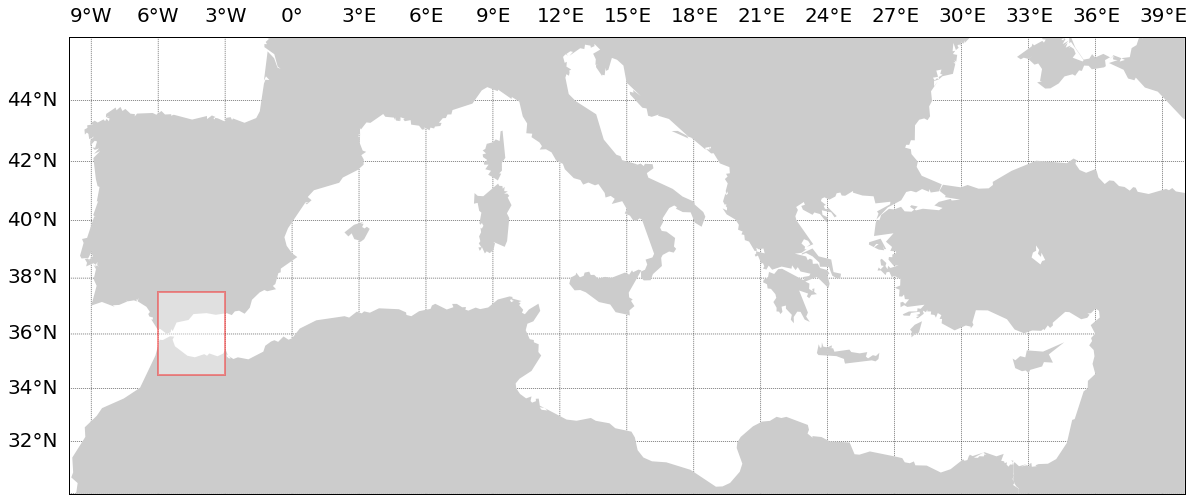

In [15]:
fig = plt.figure(figsize=(20,16))
m = Basemap(projection='merc', llcrnrlat=30., urcrnrlat=46.,llcrnrlon=-10, urcrnrlon=40., lat_ts=38., resolution='l')
m.fillcontinents(zorder=2)
m.drawparallels(np.arange(-90.,91.,2.), labels=[1,0,0,0], linewidth=0.5, zorder=1, fontsize=20)
m.drawmeridians(np.arange(-180.,181.,3.), labels=[0,0,1,0], linewidth=0.5, zorder=1, fontsize=20)
lats = [min_lat, max_lat, max_lat, min_lat]
lons = [min_lon, min_lon, max_lon, max_lon]
x,y = m( lons, lats )
xy = zip(x,y)
poly = Polygon( xy, facecolor='white', edgecolor='red', alpha=0.4, linewidth=2,zorder=3)
plt.gca().add_patch(poly)

In [16]:
end_point = '/data-sources/'
url_addons = '?bbox=%s'%(bbox)
request = requests.get('%s%s%s' % (api_url, end_point,url_addons), headers=headers)
response = json.loads(request.text)
print('Requested url: '+'%s%s%s' % (api_url, end_point,url_addons))
print(" ")
print('A total of %s SOCIB deployments overlaps such area'% (response['count']))

Requested url: http://api.socib.es/data-sources/?bbox=34.5,37.5,-6.0,-3.0
 
A total of 28 SOCIB deployments overlaps such area


Let's draw the bounding box of these deployments to check if its bounding boxes truely overlap the searching area:

Requested url: http://api.socib.es/data-sources/?bbox=34.5%2C37.5%2C-6.0%2C-3.0&page=1
Requested url: http://api.socib.es/data-sources/?bbox=34.5%2C37.5%2C-6.0%2C-3.0&page=2
Requested url: http://api.socib.es/data-sources/?bbox=34.5%2C37.5%2C-6.0%2C-3.0&page=3
Requested url: http://api.socib.es/data-sources/?bbox=34.5%2C37.5%2C-6.0%2C-3.0&page=4


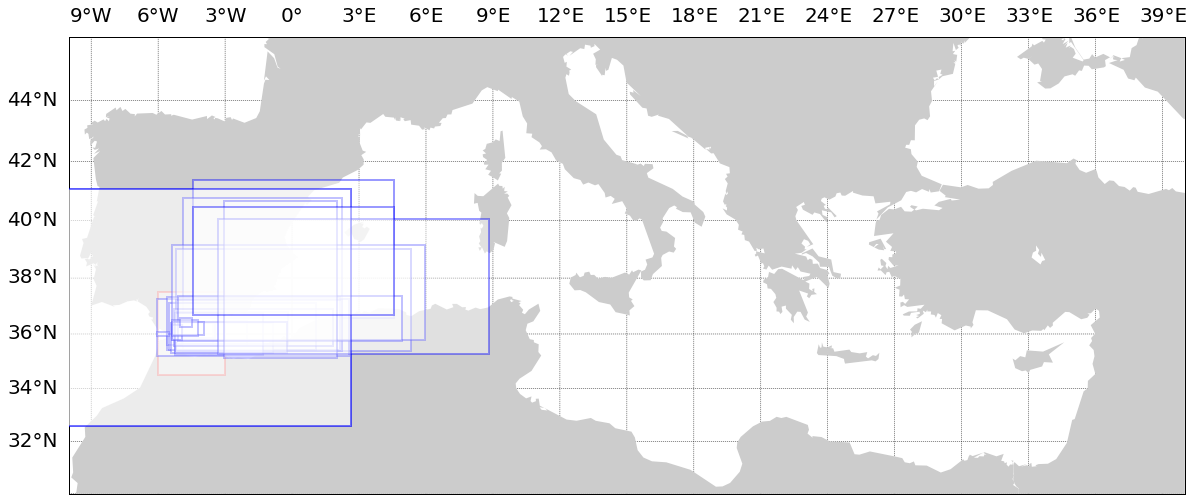

In [17]:
fig = plt.figure(figsize=(20,16))
m = Basemap(projection='merc', llcrnrlat=30., urcrnrlat=46.,llcrnrlon=-10, urcrnrlon=40., lat_ts=38., resolution='l')
m.fillcontinents(zorder=2)
m.drawparallels(np.arange(-90.,91.,2.), labels=[1,0,0,0], linewidth=0.5, zorder=1, fontsize=20)
m.drawmeridians(np.arange(-180.,181.,3.), labels=[0,0,1,0], linewidth=0.5, zorder=1, fontsize=20)
lats = [min_lat, max_lat, max_lat, min_lat]
lons = [min_lon, min_lon, max_lon, max_lon]
x,y = m( lons, lats )
xy = zip(x,y)
poly = Polygon( xy, facecolor='white', edgecolor='red', alpha=0.4, linewidth=2,zorder=3)      
plt.gca().add_patch(poly)

number_of_deployments = response['count']
number_of_deployments_per_page = len(response['results'])
next_page = response['next'].split('page=')[0]+'page=1'
while next_page != None:
    request = requests.get(next_page, headers=headers)
    response = json.loads(request.text)
    print('Requested url: '+next_page)
    try:
        next_page = response['next']
        for deployment in response['results']:
            lats = [item[1] for item in deployment['coverage_bounding_box']['coordinates'][0]]
            lons = [item[0] for item in deployment['coverage_bounding_box']['coordinates'][0]]
            x,y = m( lons, lats )
            if all(deployment['coverage_bounding_box']['coordinates'][0][0] == item for item in deployment['coverage_bounding_box']['coordinates'][0]):
                m.plot(x, y, 'bo', markersize=4)
            else:
                #mobile platforms
                xy = zip(x,y)
                poly = Polygon( xy, facecolor='white', edgecolor='blue', alpha=0.4, linewidth=2,zorder=3)
                plt.gca().add_patch(poly)
    except:
        print('fail in request: '+next_page)
        next_page = next_page.split('page=')[0]+'page='+str(int(next_page.split('page=')[1])+1)

<h3>  SEARCHING DEPLOYMENTS PERFORMED INVOLVING A CERTAIN <span>PLATFORM NAME</span></h3>

In [18]:
end_point = '/data-sources/'
platform_name = 'ibiza'
url_addons = '?platform_name=%s'%(platform_name)
request = requests.get('%s%s%s' % (api_url, end_point,url_addons), headers=headers)
response = json.loads(request.text)

print('Requested url: '+'%s%s%s' % (api_url, end_point,url_addons))
print(" ")
print('A total of %s SOCIB deployments contains %s in its platform name'% (response['count'],platform_name))

Requested url: http://api.socib.es/data-sources/?platform_name=ibiza
 
A total of 36 SOCIB deployments contains ibiza in its platform name


<h3>  SEARCHING DEPLOYMENTS BY <span>DESCRIPTION</span></h3>

In [26]:
end_point = '/data-sources/'
description = 'profiler'
url_addons = '?description=%s'%(description)
request = requests.get('%s%s%s' % (api_url, end_point,url_addons), headers=headers)
response = json.loads(request.text)

print('Requested url: '+'%s%s%s' % (api_url, end_point,url_addons))
print(" ")
print('A total of %s SOCIB deployments contains %s in its description'% (response['count'],description))

Requested url: http://api.socib.es/data-sources/?description=profiler
 
A total of 45 SOCIB deployments contains profiler in its description


<h3>  SEARCHING DEPLOYMENTS - <span> APPLYING SEVERAL CRITERIA</span></h3>

In [42]:
platform_type = 'Oceanographic Buoy'
time_range_start = '2018-07-01T00:00:00' # should match the notation YYYY-MM-DDTHH:MM:SS
time_range_end =  '2018-10-01T00:00:00' # should match the notation YYYY-MM-DDTHH:MM:SS
variables = 'standard_variable=sea_water_temperature'

In [43]:
min_lat = 40.0#float
max_lat = 38.0 #float
min_lon = 0.0 #float
max_lon = 3.0#float
bbox = str(min_lat)+','+str(max_lat)+','+str(min_lon)+','+str(max_lon)

In [44]:
end_point = '/data-sources/'
url_addons = '?platform_type=%s&initial_datetime=%s&end_datetime=%s&%s&bbox=%s'%(platform_type,time_range_start,time_range_end, variables,bbox)
request = requests.get('%s%s%s' % (api_url, end_point,url_addons), headers=headers)
response = json.loads(request.text)
print('Requested url: '+'%s%s%s' % (api_url, end_point,url_addons))
print(" ")
print('A total of %s SOCIB deployments match the above searching criteria'% (response['count']))

Requested url: http://api.socib.es/data-sources/?platform_type=Oceanographic Buoy&initial_datetime=2018-07-01T00:00:00&end_datetime=2018-10-01T00:00:00&standard_variable=sea_water_temperature&bbox=40.0,38.0,0.0,3.0
 
A total of 3 SOCIB deployments match the above searching criteria


<h3>WHAT ELSE?</h3>

<ul>
<li><b>REQUESTING A DATA-SOURCE'S DATA</b> <br><br> If you want to know more about how to access a given data-source's data overlooking the netCDF format, please have a look at the [Example 3](requesting_a_data_sources_data.ipynb) ('Accessing the data of a data-source'), where it is explained how to use auxiliary endpoints to request a deployments data.</li>
<br>
<li><b>SUBSETTING A DATA-SOURCE'S DATA</b> <br><br>If you want to know more about how to subset a given data-source's data overlooking the netCDF format, please have a look at the [Example 4](subsetting_a_data_sources_data.ipynb) ('Subsetting a data-source's data'), where it is explained how to use query parameters over the API auxiliary endpoints to subset a deployments data.</li>
<br>
<li><b>RESAMPLING A DATA-SOURCE'S DATA</b> <br><br>If you want to know more about how to resample a given data-source's data overlooking the netCDF format, please have a look at the [Example 5](resampling_a_data_sources_data.ipynb) ('Resampling a data-source's data'), where it is explained how to use query parameters over the API auxiliary endpoints to resample a deployments data.</li>
</ul>